# `keras`

Let's now introduce a python package called `keras` which will provide us with greater versatility in building neural networks than `sklearn`.

## What we will accomplish

In this notebook we will
- Introduce `keras`:
    - Discuss how to install it,
- Review its syntax and
- Demonstrate how to build feed forward networks in `keras`.

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

Moving forward we will be building our neural networks with `keras`.

From their documentation:

<blockquote>
Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research.
</blockquote>

In this notebook we will lay out how to build feed forward multi-layer networks.

For reference, this material is being built by looking at the `keras` documentation <a href="https://keras.io/about/">https://keras.io/about/</a> and the book, <a href="https://github.com/letspython3x/Books/blob/master/Deep%20Learning%20with%20Python.pdf">Deep Learning with Python</a>. In particular this notebook's content comes from chapters 3 and 4 of that text.

## Installation

You may not have `keras` installed on your computer at this point. Try and run the following code chunk.

In [2]:
# import keras

# if the above did not work 
# uncomment and then try the below
# from tensorflow import keras

print(keras.__version__)

2.11.0


If this ran for you, then you already have `keras` installed. For reference, the version of `keras` that I was running while writing this notebook was `2.11.0`.

If you received an error while running that code chunk you likely need to install `keras` to move forward.

##### Using `pip`

If you use `pip` to install packages try running:

`pip install keras`

in your command line or terminal to install `keras`.

##### Using `conda`

If you use `conda` try what is recommended at this link, <a href="https://anaconda.org/conda-forge/keras">https://anaconda.org/conda-forge/keras</a>.

##### Apple M1 chip computers

If you have an Apple computer with an M1 chip you may need extra help. Earlier in 2022 the `keras` package installation instructions did not yet play nicely with such hardware. Try performing a web search for relevant instructions.

If you are unsure if you have an M1 chip, check with these instructions <a href="https://www.howtogeek.com/706226/how-to-check-if-your-mac-is-using-an-intel-or-apple-silicon-processor/">https://www.howtogeek.com/706226/how-to-check-if-your-mac-is-using-an-intel-or-apple-silicon-processor/</a>.

## Building a neural net with `keras`

### Classifying MNIST

We will mimic our `sklearn` networks from the last notebook and build an MNIST classifier, using the `keras` version of the data.

In [3]:
## This imports datasets stored in keras
from keras.datasets import mnist

In [6]:
## Here we load the data
(X_train, y_train),(X_test, y_test) = mnist.load_data()

print("og shape of X_train", np.shape(X_train))

og shape of X_train (60000, 28, 28)


In [7]:
X_train[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

##### Reshape the data to be a single column

We will now reshape the data so that it has $60{,}000$ observations ($10{,}000$ for the test set) of $28\times28$ pixels. This will give us a $60000 \times 784$ $2$-D `numpy` array ($10000 \times 784$ for the test set).

In [8]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

print("The new shape of X_train is", np.shape(X_train))
print("The new shape of X_test is", np.shape(X_test))

X_train = X_train/255
X_test = X_test/255

The new shape of X_train is (60000, 784)
The new shape of X_test is (10000, 784)


In [9]:
X_train[0,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Building the networks

We start by importing all of the necessary pieces. We will explain each piece as we need it.

In [10]:
## import things
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical

# for earlier versions of keras run this instead
# from keras.utils import to_categorical
# instead of running
# from keras.utils.np_utils import to_categorical
# or look up the documentation for your version


What we learned as feed forward networks in the last notebook are also called <i>dense</i> networks because they are fully connected graphs.

We will now walk through the process of making a dense neural networks using `keras`.

##### 1. Make an empty `model`

In [11]:
## we first make an empty model
## Sequential means we'll make a group
## of a linear stack of layers
model = models.Sequential()

##### 2. Add the layers to the `model`

We will build the following neural network architecture in this step.

<img src="mnist_net.png" width="70%"></img>

In [12]:
###### ONLY RUN THIS ONCE! ##########

## you add a layer with .add()
## A Dense layer means a fully connected feedforward layer
## the 16 means the layer is 16 nodes tall
## activation='relu' means the layer uses a relu activation function
## the first layer needs to be told the shape of the input data
model.add(layers.Dense(16, activation='relu', input_shape=(28*28,)))

# we then add a second layer that is 16 nodes tall
# and uses the relu activation function
# note we don't need the input shape here, 
# it is inferred from the first layer's output
model.add(layers.Dense(16, activation='relu'))


# finally we add the output layer
# this will have a single node, representing a probability
# that the observation has positive sentiment
# this is why the activation is a softmax
# for more information on the softmax see the Practice Problems
model.add(layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


##### 3. Compile the model with an optimizer,  loss and metric

The optimizer we use is `rmsprop`, this is an algorithm implemented by `keras` to perform the backpropagation step in fitting the neural network.

The loss we use is `categorical_crossentropy` which stems from information theory, this is the "cost function" we discussed in notebook 3. This is a common and popular choice for classification problems. See the HW notebook for an explanation of crossentropy.

The metric we use is simply `accuracy`.

Note that there are more options for all three of these choices and if you are interested in seeing more check out the `keras` documentation, it has an excellent search bar. There is also the possibility to use your own custom inputs as well.

In [14]:
## we compile the network like so
## call .compile
## set our optimizer, optimizer='rmsprop'
## set our loss, loss='categorical_crossentropy'
## set our desired metrics, metrics=['accuracy']
model.compile(optimizer='rmsprop', 
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

##### 4. Fit the model on the training data

We fit our model on the training data, we'll look at $100$ epochs that use batch gradient descent with a batch size of `512` observations per batch.

We first create a validation set, this will be additional input for the model.

In [15]:
## First make the validation set
from sklearn.model_selection import train_test_split

X_train_train,X_val,y_train_train,y_val = train_test_split(X_train, y_train,
                                                          test_size=.2,
                                                          shuffle=True,
                                                          stratify=y_train,
                                                          random_state=440)

##### `to_categorical`

In order for the desired output of our model to play nicely with the training and validation data we have to first turn each observation into a categorical output with the `keras` function `to_categorical`. Let's see what this does.

In [16]:
print(y_train)

print("\n\n\n")

print(to_categorical(y_train))

[5 0 4 ... 5 6 8]




[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [18]:
## I now fit the model, and store the training history
## I use 100 epochs and a batch_size of 512
n_epochs = 100
batch_size = 512
history = model.fit(X_train,
                    to_categorical(y_train),
                    epochs=n_epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, to_categorical(y_val)))

Epoch 1/100


2023-05-25 18:54:04.101370: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


118/118 [==============================] - 0s 2ms/step - loss: 1.1492 - accuracy: 0.6669 - val_loss: 0.5474 - val_accuracy: 0.8621
Epoch 2/100
118/118 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.8803 - val_loss: 0.3714 - val_accuracy: 0.9020
Epoch 3/100
118/118 [==============================] - 0s 1ms/step - loss: 0.3431 - accuracy: 0.9056 - val_loss: 0.3184 - val_accuracy: 0.9107
Epoch 4/100
118/118 [==============================] - 0s 1ms/step - loss: 0.3024 - accuracy: 0.9157 - val_loss: 0.2923 - val_accuracy: 0.9171
Epoch 5/100
118/118 [==============================] - 0s 2ms/step - loss: 0.2770 - accuracy: 0.9226 - val_loss: 0.2778 - val_accuracy: 0.9208
Epoch 6/100
118/118 [==============================] - 0s 1ms/step - loss: 0.2598 - accuracy: 0.9269 - val_loss: 0.2672 - val_accuracy: 0.9237
Epoch 7/100
118/118 [==============================] - 0s 1ms/step - loss: 0.2478 - accuracy: 0.9298 - val_loss: 0.2548 - val_accuracy: 0.9286
Epoch 8/100

118/118 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.9676 - val_loss: 0.1076 - val_accuracy: 0.9695
Epoch 59/100
118/118 [==============================] - 0s 1ms/step - loss: 0.1086 - accuracy: 0.9680 - val_loss: 0.1148 - val_accuracy: 0.9658
Epoch 60/100
118/118 [==============================] - 0s 2ms/step - loss: 0.1083 - accuracy: 0.9683 - val_loss: 0.1043 - val_accuracy: 0.9703
Epoch 61/100
118/118 [==============================] - 0s 1ms/step - loss: 0.1074 - accuracy: 0.9684 - val_loss: 0.1081 - val_accuracy: 0.9686
Epoch 62/100
118/118 [==============================] - 0s 1ms/step - loss: 0.1069 - accuracy: 0.9686 - val_loss: 0.1121 - val_accuracy: 0.9672
Epoch 63/100
118/118 [==============================] - 0s 1ms/step - loss: 0.1061 - accuracy: 0.9686 - val_loss: 0.1092 - val_accuracy: 0.9694
Epoch 64/100
118/118 [==============================] - 0s 1ms/step - loss: 0.1052 - accuracy: 0.9689 - val_loss: 0.1024 - val_accuracy: 0.9697
Epoch

##### 5. Examine epoch history loss and accuracy

The data stored in `history` includes a dictionary with epoch information on both the training and validation losses and accuracies.

In [19]:
history

In [22]:
history_dict = history.history

In [23]:
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


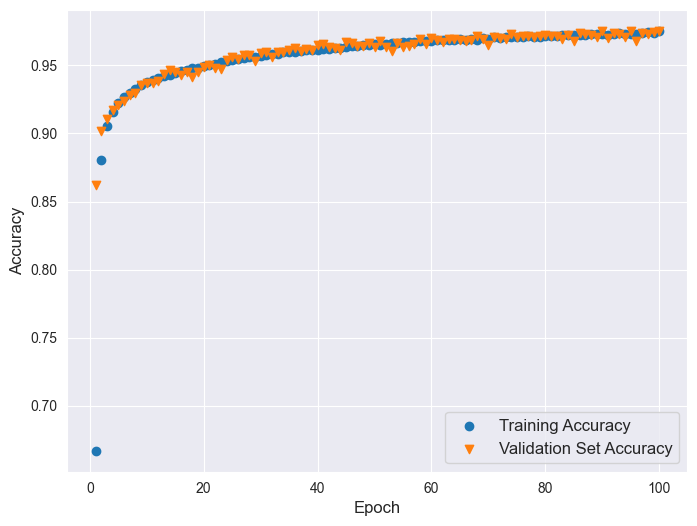

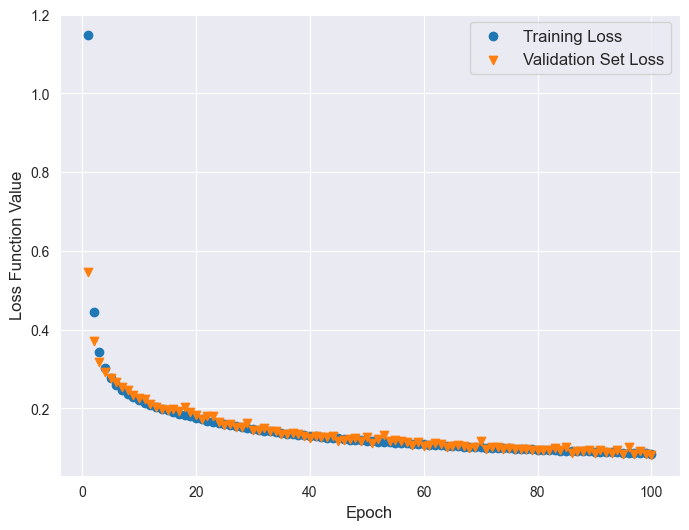

In [24]:
plt.figure(figsize = (8,6))

plt.scatter(range(1,n_epochs+1), history_dict['accuracy'], label = "Training Accuracy")
plt.scatter(range(1,n_epochs+1), history_dict['val_accuracy'], marker='v', label = "Validation Set Accuracy")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)

plt.show()


plt.figure(figsize = (8,6))

plt.scatter(range(1,n_epochs+1), history_dict['loss'], label = "Training Loss")
plt.scatter(range(1,n_epochs+1), history_dict['val_loss'], marker='v', label = "Validation Set Loss")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss Function Value", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)

plt.show()

##### 6. Tuning the model architecture

Looking at data like this can allow us to choose a training period, i.e. the number of epochs, for a neural network as well as compare performance across two different networks. Let's try a comparison to a second network.

In [25]:
model2 = models.Sequential()

model2.add(layers.Dense(32, activation='relu', input_shape=(28*28,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

model2.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

history2 = model2.fit(X_train_train,
                       to_categorical(y_train_train),
                       epochs = n_epochs,
                       batch_size = batch_size,
                       validation_data = (X_val, to_categorical(y_val)))

history_dict2 = history2.history

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.8249 - accuracy: 0.7806 - val_loss: 0.3899 - val_accuracy: 0.8929
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.9089 - val_loss: 0.2826 - val_accuracy: 0.9182
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.2520 - accuracy: 0.9276 - val_loss: 0.2440 - val_accuracy: 0.9294
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.2165 - accuracy: 0.9376 - val_loss: 0.2167 - val_accuracy: 0.9377
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1921 - accuracy: 0.9441 - val_loss: 0.2073 - val_accuracy: 0.9389
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.9491 - val_loss: 0.1863 - val_accuracy: 0.9456
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9531 - val_loss: 0.1840 - val_accuracy: 0.9448
Epoch 8/100
9

Epoch 59/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 0.9946 - val_loss: 0.1435 - val_accuracy: 0.9660
Epoch 60/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9949 - val_loss: 0.1404 - val_accuracy: 0.9657
Epoch 61/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.9953 - val_loss: 0.1408 - val_accuracy: 0.9678
Epoch 62/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.9951 - val_loss: 0.1453 - val_accuracy: 0.9653
Epoch 63/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 0.9956 - val_loss: 0.1399 - val_accuracy: 0.9683
Epoch 64/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9958 - val_loss: 0.1402 - val_accuracy: 0.9674
Epoch 65/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.9961 - val_loss: 0.1480 - val_accuracy: 0.9667
Epoch 

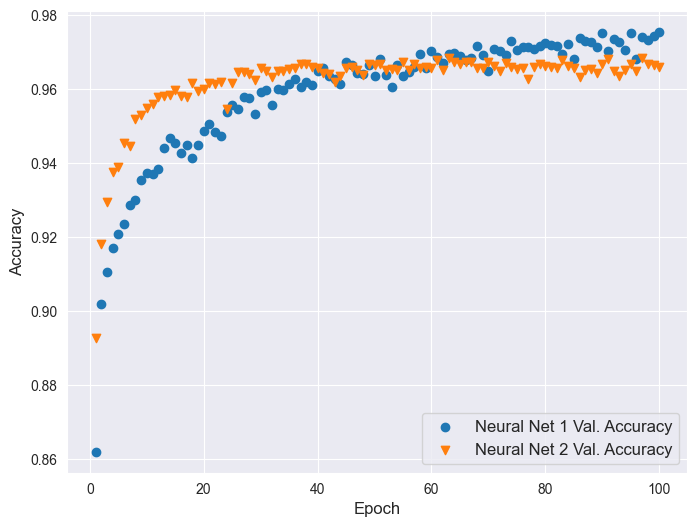

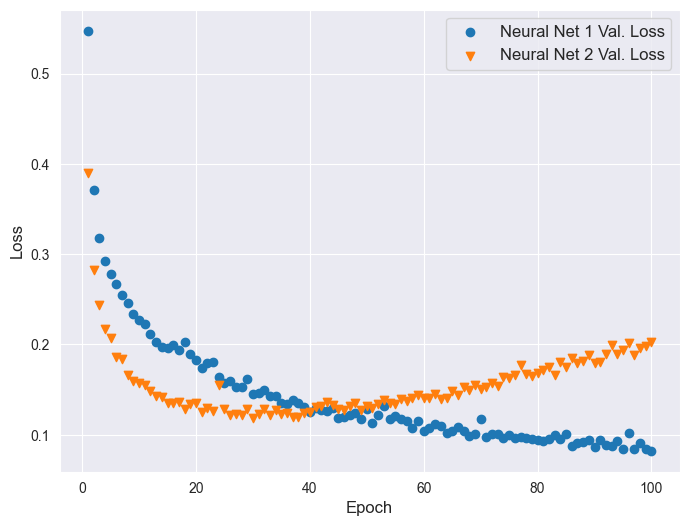

In [26]:
plt.figure(figsize = (8,6))

plt.scatter(range(1,n_epochs+1), history_dict['val_accuracy'], label = "Neural Net 1 Val. Accuracy")
plt.scatter(range(1,n_epochs+1), history_dict2['val_accuracy'], marker='v', label = "Neural Net 2 Val. Accuracy")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)

plt.show()

plt.figure(figsize = (8,6))

plt.scatter(range(1,n_epochs+1), history_dict['val_loss'], label = "Neural Net 1 Val. Loss")
plt.scatter(range(1,n_epochs+1), history_dict2['val_loss'], marker='v', label = "Neural Net 2 Val. Loss")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)

plt.show()

##### 7. Selecting an architecture

It looks like the 32 x 32 network edges out the 16 x 16. Let's find the epoch that resulted in the lowest validation loss and use that for our final model.

In [27]:
print("The epoch that had the lowest model 2 validation loss was",
     range(1,n_epochs)[np.argmin(history_dict2['val_loss'])])

The epoch that had the lowest model 2 validation loss was 30


In [28]:
model2 = models.Sequential()

model2.add(layers.Dense(32, activation='relu', input_shape=(28*28,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

model2.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

history2 = model2.fit(X_train,
                       to_categorical(y_train),
                       epochs = range(1,n_epochs+1)[np.argmin(history_dict2['val_loss'])],
                       batch_size = 512,
                       validation_data = (X_val, to_categorical(y_val)))

history_dict2 = history2.history

Epoch 1/30
118/118 [==============================] - 0s 3ms/step - loss: 0.8275 - accuracy: 0.7771 - val_loss: 0.3679 - val_accuracy: 0.9003
Epoch 2/30
118/118 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.9106 - val_loss: 0.2940 - val_accuracy: 0.9121
Epoch 3/30
118/118 [==============================] - 0s 2ms/step - loss: 0.2538 - accuracy: 0.9272 - val_loss: 0.2467 - val_accuracy: 0.9313
Epoch 4/30
118/118 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.9379 - val_loss: 0.2196 - val_accuracy: 0.9394
Epoch 5/30
118/118 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.9434 - val_loss: 0.2008 - val_accuracy: 0.9423
Epoch 6/30
118/118 [==============================] - 0s 2ms/step - loss: 0.1794 - accuracy: 0.9480 - val_loss: 0.1962 - val_accuracy: 0.9445
Epoch 7/30
118/118 [==============================] - 0s 2ms/step - loss: 0.1647 - accuracy: 0.9524 - val_loss: 0.1929 - val_accuracy: 0.9408
Epoch 

#### 8. Predicting on the validation set

Let's now use this model to predict on the validation set. This is quite similar to the procedure you would follow in the `sklearn` setup.

In [34]:
np.argmax(model2.predict(X_train)[18,:])

1875/1875 [==============================] - 1s 319us/step


6

In [35]:
y_train[18]

6

Note that this produces a set of probabilities for each observation. For our prediction of an actual observation we can just choose the one with highest probability.

In [36]:
np.argmax(model2.predict(X_val), axis=1)

375/375 [==============================] - 0s 341us/step


array([9, 5, 6, ..., 3, 5, 0])

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
np.round(100*accuracy_score(y_val, np.argmax(model2.predict(X_val), axis=1)),2)

375/375 [==============================] - 0s 448us/step


97.97

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)